# Distributions Examples with Python - 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

# Normal Distribution

## Problem statement

A testing agency wants to analyze the complexity of SAT Exam 2020. They have collected the SAT scores of 1000 students in "sat_score.csv". Let's answer some of the questions that will help to decide the complexity of SAT exam 2020.


 
1. Calculate the probability that a student will score less than 800 in SAT exam
2. Calculate the probability that a student will score more than 1300 in SAT exam
3. Calculate the minimum marks a student must score in order to secure 90th percentile
4. Calculate the minimum marks a student must score in order to be in the top 5%



In [2]:
df = pd.read_csv('sat_score.csv')
df.head()

,student_id,score
0,1,1018
1,2,1218
2,3,611
3,4,723
4,5,541


In [3]:
from scipy.stats import norm

mu = df['score'].mean()
sigma = df['score'].std()

print(f'The mean is {round(mu,2)}')
print(f'The std is {round(sigma,2)}')

The mean is 1007.46
The std is 204.43


### Plotting the Distribution 

It  will help us analyze the shape of the data and visualize the PDF of normal distribution using the parameters (mean (mu) and Standard deviation (sigma)) from the data.

In [4]:
density = pd.DataFrame()
density['x'] = np.linspace(
    df['score'].min() - 0.01, df['score'].max() + 0.01, 100
)

density['pdf'] = norm.pdf(density['x'], mu, sigma)
density

,x,pdf
0,287.990000,0.000004
1,301.363939,0.000005
2,314.737879,0.000006
3,328.111818,0.000008
4,341.485758,0.000010
...,...,...
95,1558.514242,0.000052
96,1571.888182,0.000043
97,1585.262121,0.000036
98,1598.636061,0.000030


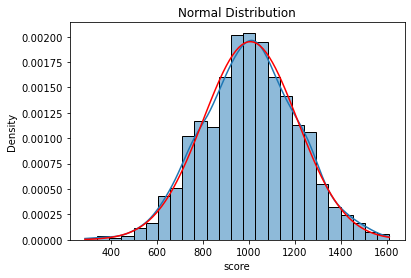

In [5]:
fig, ax = plt.subplots()

sns.histplot(df['score'], ax=ax, kde=True, stat='density')

ax.plot(density['x'], density['pdf'], color='red')

plt.title('Normal Distribution')
plt.show()

**Insight:**  As you can see in the above plot, there are two curves red and blue. Blue curve represents the shape of data distribution and the red curve represents the PDF (Probability density function). This data is approximately normal. Thus, we can assume this data distribution to be normal and perform our calculations based on the normality assumption.

X ~ N(mu, sigma)

**Calculate the probability that a student will score less than 800 in SAT exam.**

In [6]:
prob_less_than_800 = norm.cdf(800, mu, sigma)

print(f'The prob that a student will score less than 800 is {round(prob_less_than_800, 4)}')

The prob that a student will score less than 800 is 0.1551


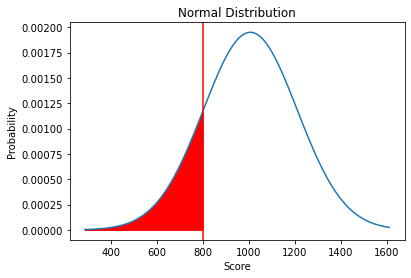

In [7]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.

plt.plot(density["x"], density["pdf"]) # plot the pdf of the normal distribution

plt.axvline(x=800, c="r") # draw a red vertical line at x = 800

x1 = np.linspace(density["x"].min(), 800, 50) # create an array of 50 numbers between min SAT score and 800

plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r") # fill the specified region with red color

plt.xlabel("Score") # set the x-axis label
plt.ylabel("Probability") # set the y-axis label
plt.title("Normal Distribution") # set the title
plt.show() # display the plot

**Calculate the probability that a student will score more than 1300 in SAT exam.**

In [8]:
prob_greater_than_1300 = 1 - norm.cdf(1300, mu, sigma)

print(f'The prob that a student will score more than 1300 is {round(prob_greater_than_1300, 4)}')

The prob that a student will score more than 1300 is 0.0762


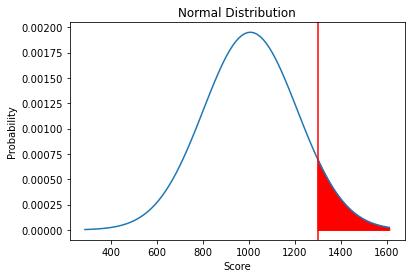

In [9]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.

plt.plot(density["x"], density["pdf"])

plt.axvline(x=1300, c="r")

x1 = np.linspace(1300, density["x"].max(), 50)

plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r")

plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

**Calculate the minimum marks a student must score in order to be in the 90th percentile**

In [10]:
score_90th_percentile = norm.ppf(0.90, mu, sigma)
print(f'The 90th percentile score should be {round(score_90th_percentile)}')

The 90th percentile score should be 1269


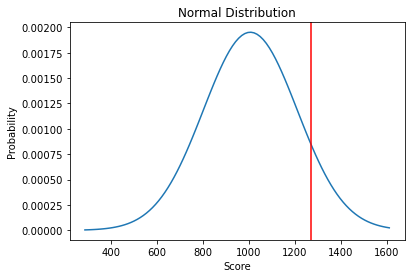

In [11]:
plt.plot(density['x'], density['pdf'])

plt.axvline(x=score_90th_percentile, c='r')

plt.xlabel('Score')
plt.ylabel('Probability')
plt.title('Normal Distribution')
plt.show()

**Calculate the minimum marks a student must score in order to be in the top 5%**

In [12]:
score_top_five_percent = norm.ppf(0.95, mu, sigma)
print(f'The minimum score to be in top 5% should be {round(score_top_five_percent)}')

The minimum score to be in top 5% should be 1344


In [24]:
mu=1
sigma=0.2
norm.ppf(0.965, mu, sigma)

1.3623821345905194

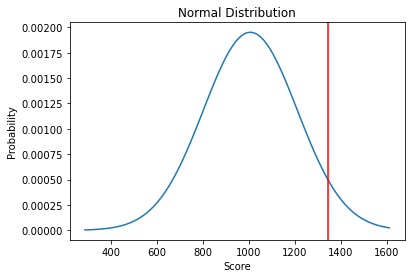

In [14]:
plt.plot(density['x'], density['pdf'])

plt.axvline(x=score_top_five_percent, c='r')

plt.xlabel('Score')
plt.ylabel('Probability')
plt.title('Normal Distribution')
plt.show()

**Conclusion:** 

1) Only 15.51% of students will score below 800 and 7.62% of students will score above 1300. It shows that the 2020 SAT exam's complexity is moderate. 

2) Students should score at least 1269 to secure the 90th percentile.

3) Students should score at least 1344 to be in the top 5%.

### Standardization of Normal Variables

Suppose we know that the SAT scores are normally distributed with mean 1000 and standard deviation 200 and ACT scores are normally distributed with mean 20 and standard deviation 5. 

A college provides admission only on the basis of SAT and ACT scores. The college admin decides to give the top performer fellowship to the student who has performed the best among all applicants. The highest score received from applicants who appeared for SAT is 1350 and the highest score received from applicants who appeared for ACT is 30. 

Help the college to choose the best candidate for the fellowship!

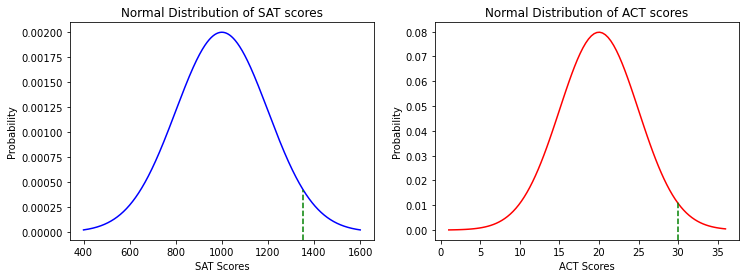

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

x = np.linspace(400, 1600, 1000)

ax1.plot(x, norm.pdf(x, loc=1000, scale=200), color='b')
ax1.set_title('Normal Distribution of SAT scores')
ax1.set_xlabel('SAT Scores')
ax1.set_ylabel('Probability')
ax1.axvline(1350, ymax=0.23, linestyle='--', color='green')

x1 = np.linspace(1, 36, 100)

ax2.plot(x1, norm.pdf(x1, loc=20, scale=5), color='r')
ax2.set_title('Normal Distribution of ACT scores')
ax2.set_xlabel('ACT Scores')
ax2.set_ylabel('Probability')
ax2.axvline(30, ymax=0.18, linestyle='--', color='green')

plt.show()

In the above plot, the blue curve represents the distribution of SAT scores and the red curve represents the distribution of ACT scores. The highest scores of the applicants in SAT and ACT exams are dotted with green lines in the respective distributions. However, it is difficult for us to compare the raw highest scores in the above plot. Thus, we need to standardize the two scores and compare their Z-scores.

In [16]:
top_sat = (1350 - 1200) / 200
print(f'The Z-score of highest scorer in SAT among all the apllicants is {top_sat}')

top_act = (30-20) / 5
print(f'The Z-score of highest scorer in ACT among all the applicants is {top_act}')


The Z-score of highest scorer in SAT among all the apllicants is 0.75
The Z-score of highest scorer in ACT among all the applicants is 2.0


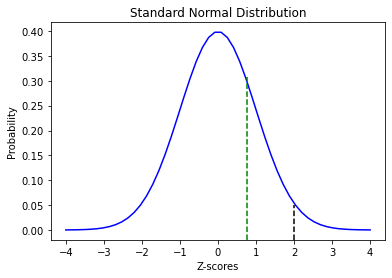

In [17]:
fig, ax = plt.subplots()

x = np.linspace(-4, 4, 50)

ax.plot(x, norm.pdf(x, loc=0, scale=1), color='b')

ax.set_title('Standard Normal Distribution')
ax.set_xlabel('Z-scores')
ax.set_ylabel('Probability')

ax.axvline(top_sat, ymax=0.75, linestyle='--', color='green')
ax.axvline(top_act, ymax=0.16, linestyle='--', color='black')

plt.show()

In the above plot, the green line represents the standardized highest SAT score of the applicants which is 1.75 standard deviations above the mean and the black line represents the standardized highest ACT score of the applicants which is 2 standard deviations above the mean.

This means that among the applicants, the highest scorer in ACT performed better than the highest scorer in SAT.

Thus, the top performer fellowship should be given to the applicant who has scored highest in ACT.